In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0xdeadbeef)

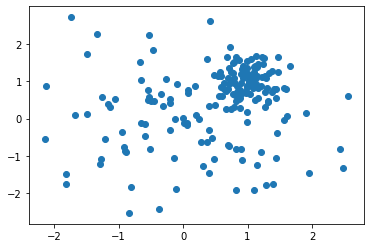

In [2]:
sample1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 100)
sample2 = np.random.multivariate_normal([1,1], [[0.05,0],[0,0.1]], 100)
sample = np.concatenate([sample1, sample2])
plt.scatter(sample[:,0],sample[:,1])

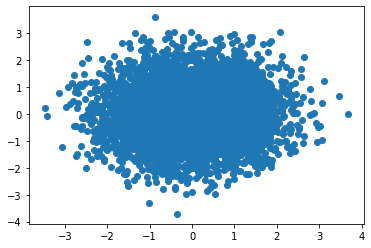

In [3]:
sample1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 5000)
sample2 = np.random.multivariate_normal([1,1], [[0.05,0],[0,0.1]], 5000)
sample = np.concatenate([sample1, sample2])
plt.scatter(sample[:,0],sample[:,1])

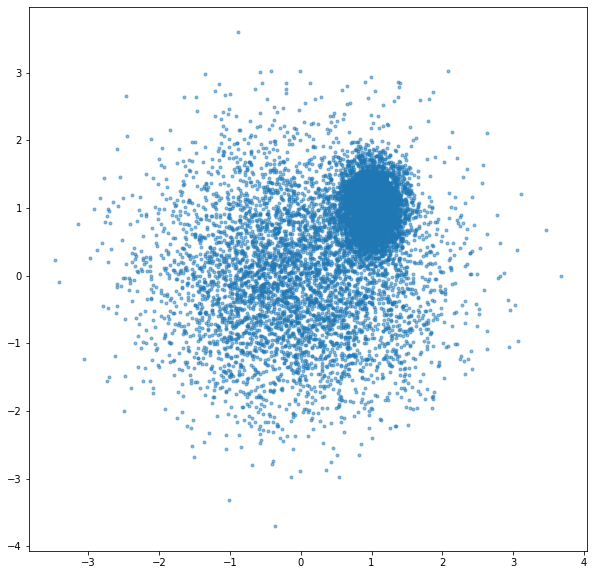

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(sample[:,0],sample[:,1], alpha=0.5, marker='.')

In [5]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [6]:
tools = "hover, box_zoom, undo, crosshair"
p = figure(tools=tools)
p.scatter(sample[:,0], sample[:,1], alpha=0.5)
show(p)

In [7]:
from bokeh.models import ColumnDataSource, HoverTool
import pandas as pd 

In [8]:
df = pd.DataFrame(sample, columns=('x','y'))
df.head()

,x,y
0,0.849694,1.881592
1,0.394075,0.958888
2,-1.749096,-0.054847
3,0.859521,-0.815819
4,-0.772113,-0.605808


In [9]:
df['value'] = np.sqrt(df['x']**2 + df['y']**2)
df.head()

,x,y,value
0,0.849694,1.881592,2.064550
1,0.394075,0.958888,1.036707
2,-1.749096,-0.054847,1.749955
3,0.859521,-0.815819,1.185047
4,-0.772113,-0.605808,0.981408


In [10]:
source = ColumnDataSource(df)
tools = "box_zoom, undo, crosshair"
p = figure(tools=tools)
p.scatter('x','y', source=source, alpha=0.5)
p.add_tools(
    HoverTool(
        tooltips=[('value','@value{2.2f}'), 
                  ('index', '@index')]
    )
)
show(p)

In [11]:
df.loc[3202]

x       -0.859018
y        2.152588
value    2.317660
Name: 3202, dtype: float64

In [12]:
from bokeh.layouts import grid
from bokeh.models import Button, TextInput
def modify_doc(doc):
    source = ColumnDataSource(df)
    p = figure(tools=tools)
    p.scatter('x','y', source=source, alpha=0.5)
    p.add_tools(
        HoverTool(
            tooltips=[('value','@value{2.2f}'), 
                      ('index', '@index')]
        )
    )
    def update():
        n = int(npoints.value)
        sample3 = np.random.multivariate_normal([-1,-1], [[0.05,0],[0,0.1]], n)
        df_new = pd.DataFrame(sample3, columns=('x','y'))
        df_new['value'] = np.sqrt(df['x']**2 + df['y']**2)
        source.stream(df_new)
    
    button = Button(label='add points:')
    npoints = TextInput(value="50")
    button.on_click(update)
    layout = grid([[button, npoints], p])
    doc.add_root(layout)
    # doc.add_periodic_callback(update, 1000)
show(modify_doc)